In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import operator
from matplotlib.lines import Line2D  # for legend handle
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

In [3]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
    sep=',', 
    header=None,
    names=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
          "body-style", "drive-wheels", "engine-location", "wheel-base", "length",
          "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
          "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
          "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"],
    na_values=['?'],
    dtype={"price":"float64"}
)

# calculate new variable: convex-volume

df['convex-volume'] = df['length'] * df['width'] * df['height']
#plt.hist(df['convex-volume'])
#plt.show()

makes = collections.Counter(df['make'])
makes_title_case = [x.title() for x in list(dict(sorted(makes.items(),key=operator.itemgetter(1), reverse=True)).keys())]
makes_title_case = list(map(lambda x: x.replace('Bmw', 'BMW'), makes_title_case))

# categorize cars by frequency of make in data set such that
# common_make = True if make has frequency > 10
# common_make = False if make has frequency <= 10

common_makes = df['make'].value_counts() > 10
common_makes = common_makes[common_makes == True].index.values
#len(common_makes[df_common_make == True])
df_common_makes = df[df['make'].isin(common_makes)]
df_1 = df.copy()
df_1['common-make'] = df_1['make'].isin(common_makes)

df_1['all'] = ""

# subset df_1 to include only cars from top 5 most common makes
df_top5_makes = df_1[df_1['make'].isin(common_makes[0:5])].reset_index()

#print(df_top5_makes['make'].value_counts(),"\n-------------------------")
#print(df_top5_makes['body-style'].value_counts())

<AxesSubplot:title={'center':'Figure 1: HeatMap Correlation Matrix of Numeric Attributes'}>

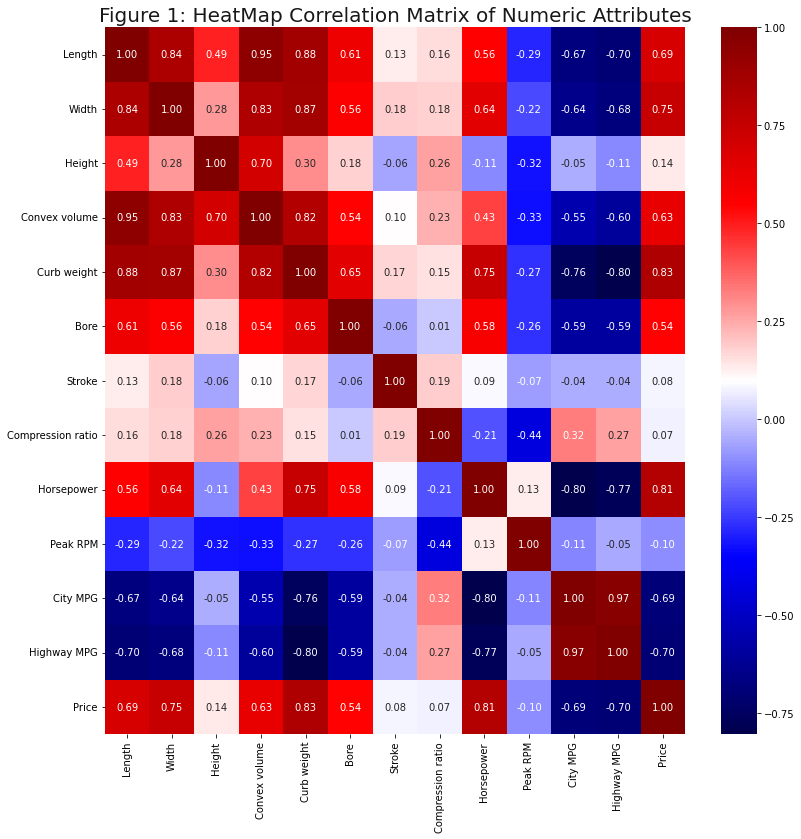

In [119]:
# correlation heat map of numeric variables

indiv_numeric_attributes = ["length", "width", "height", "convex-volume", "curb-weight",
                           "bore", "stroke", "compression-ratio",
                           "horsepower", "peak-rpm","city-mpg", "highway-mpg",
                           "price"]
df_numeric_attributes = df_1.filter(items = indiv_numeric_attributes).copy()
df_numeric_attributes.columns = ["Length", "Width", "Height", "Convex volume", "Curb weight",
                                "Bore", "Stroke", "Compression ratio",
                                "Horsepower", "Peak RPM","City MPG", "Highway MPG",
                                "Price"]
df_numeric_attributes
# Add title and assign size of heatmap
fig, ax = plt.subplots()
fig.set_size_inches(13,13)
plt.title('Figure 1: HeatMap Correlation Matrix of Numeric Attributes', size = 20, color = 'Black', alpha = 0.9)
# Correlation
corr = df_numeric_attributes.corr()
# Heatmap
sns.heatmap(corr, cmap="seismic", annot=True, fmt='.2f')

In [6]:
df_1['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

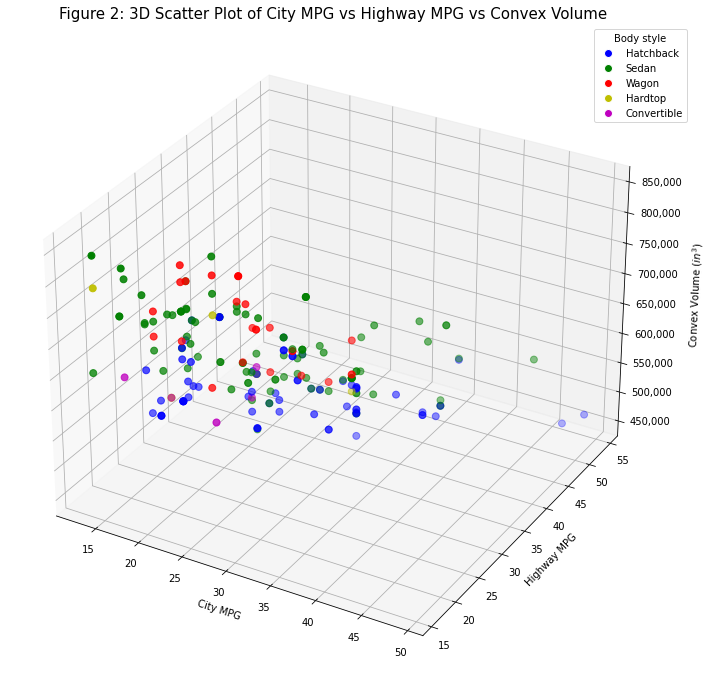

In [109]:
# 3d scatterplot of city MPG vs highway MPG vs convex volume

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,12))
colors = {'hatchback':'b',
           'sedan':'g',
           'wagon':'r',
           'hardtop':'y',
           'convertible':'m'}

ax.scatter(df_1['city-mpg'], df_1['highway-mpg'], df_1['convex-volume'], c = df_1['body-style'].map(colors),
          marker='o', s=48)
ax.set_xlabel('City MPG')
ax.set_ylabel('Highway MPG')
ax.zaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='z', which='major', pad=12)
ax.set_zlabel('Convex Volume $(in^3)$', labelpad = 24)
plt.title('Figure 2: 3D Scatter Plot of City MPG vs Highway MPG vs Convex Volume', size = 15, color = 'Black', alpha = 1)
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k.title(), markersize=8) for k, v in colors.items()]
ax.legend(title='Body style', handles=handles, bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

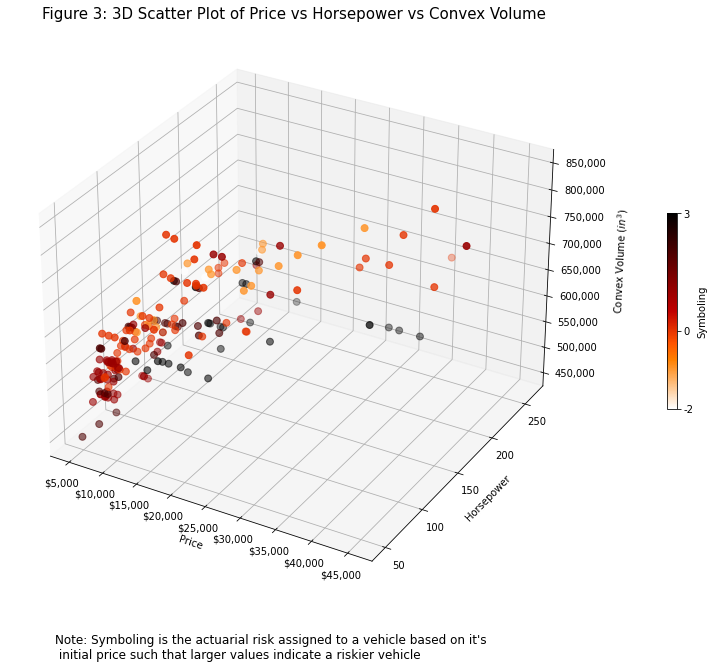

In [106]:
# 3d scatter plot of price vs horsepower vs convex-volume vs symboling
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,12))

fig3 = ax.scatter(df_1['price'], df_1['horsepower'], df_1['convex-volume'], c = df_1['symboling'],
                 marker='o', s=48, cmap='gist_heat_r')

cbar = fig.colorbar(fig3, ticks = [-2, 0, 3], fraction = 0.015, shrink = 0.3, pad = 0.13,
                   label='Symboling')
cbar.ax.set_yticklabels(['-2', '0', '3']) # vertically oriented colorbar

ax.set_xlabel('Price')
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.set_ylabel('Horsepower')
ax.zaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='z', which='major', pad=12)
ax.set_zlabel('Convex Volume $(in^3)$', labelpad = 24)
plt.title('Figure 3: 3D Scatter Plot of Price vs Horsepower vs Convex Volume', size = 15, color = 'Black', alpha = 1)

fig3_caption="Note: Symboling is the actuarial risk assigned to a vehicle based on it's\n initial price such that larger values indicate a riskier vehicle"
fig.text(0.18, 0.1, fig3_caption, fontsize=12)

plt.show()